# Classificartion

Up to now, we have been working with **regression** problems, where **the goal is to predict a continuous value**. In this notebook, we will focus on **classification** problems, where **the goal is to predict a discrete value**, or **classes**.


### What is Classification?
- Classification is a supervised learning problem where the goal is to predict a label for each instance (e.g., classifying emails as spam/not spam).
- Difference between binary classification (2 classes) and multiclass classification (more than 2 classes).

Take a look at the following image. It shows the difference between regression and classification problems:


<img src="../assets/img/regression_vs_classif.png" alt="regerssion_vs_classification" width="500"/>

### Agenda

In this leture, we will cover two classification algorithms: 
- **Logistic Regression**; and
- **K-Nearest Neighbors**. 

But there are many other classification algorithms, such as **Support Vector Machines**, **Decision Trees**, **Random Forests**, **Gradient Boosting**, **Neural Networks**, and many others. While we are not covering them here, we encourage you to explore them on your own.

Let's start:

## Logistic Regression

Despite having "regression" in its name, **Logistic Regression** is actually a classifier. It uses a **Sigmoid Function** to map the probability of belonging to a class:

### The theory

$$P(y=1|X) = \frac{1}{1 + e^{-(aX + B)}}$$

Where:

- $P(y=1|X)$ is the probability of the target variable being 1 given the input features $X$.
- $a$ and $B$ are the parameters of the model.
- $e$ is the base of the natural logarithm.

**What else can you see in this foruma that you already saw last week?**

#### Key Points:
- Probability output between 0 and 1.
- Threshold decision: classify as 1 if $P(y=1|X) > 0.5$, otherwise 0.

Let's comapre visually:

<img src="../assets/img/linreg_vs_logreg.png"  alt="linreg_vs_logreg" width="700"/>

Logistic regression is used for binary classification tasks. The logistic function (or sigmoid function) transforms the linear output into a probability, making it ideal for predicting binary outcomes.

Now let's do it with code:


### The dataset

In [2]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

# Setup notebook
pd.set_option('display.max_columns', None)

In [3]:
# Load Titanic dataset
data = pd.read_csv("../data/ML_titanic_dataset.csv")

# See first 5 rows of the dataset
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Now Let's take a look at the *schema* of this dataset using python.

The `.info()` method is used to get a concise summary of the dataframe. It comes really handy when doing exploratory analysis of the data.

In [4]:
# Check dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


While the `.info()`method is useful, it does not fully explains what each of the variables actually mean. For that, and this is really important when you are working with real world data, you should always have (or request) a **data dictionary** at hand.

Let's take a look at the data dictionary:

<details>
    <summary> 📖 <i>Data Dictionary</i></summary>


| Variable   | Definition                                  | Key                                        | Data Type   |
|------------|---------------------------------------------|--------------------------------------------|-------------|
| survival   | Passenger survival status                   | 0 = No, 1 = Yes                            | int         |
| pclass     | Passenger ticket class                      | 1 = 1st class, 2 = 2nd class, 3 = 3rd class| int         |
| sex        | Gender of the passenger                     | Male or Female                             | object      |
| Age        | Age of the passenger in years               | Numeric values, may contain null values    | float       |
| sibsp      | Number of siblings or spouses aboard        | Numeric count                              | int         |
| parch      | Number of parents or children aboard        | Numeric count                              | int         |
| ticket     | Passenger's ticket number                   | Alphanumeric code                          | object      |
| fare       | Amount of money paid for the ticket         | Numeric value representing fare cost       | float       |
| cabin      | Passenger's cabin number                    | Alphanumeric cabin identifier, may contain null values | object      |
| embarked   | Port where the passenger boarded the ship   | C = Cherbourg, Q = Queenstown, S = Southampton | object   |

</details>

What **variables** do you believe we should use for this model and why?

<details>
  <summary>💡 <i>Hint</i></summary>

  - **Pclass**: Good candidate. Higher-class passengers likely had better access to lifeboats.
  - **Sex**: Good candidate. Women were prioritized during evacuation.
  - **Age**: Good candidate. Children were given priority, making age relevant.
  - **SibSp**: Worth considering. Traveling with family could influence survival.
  - **Parch**: Worth considering. Family presence may affect survival chances.
  - **Fare**: Good candidate. Higher fare suggests wealth, potentially impacting survival.
  - **Embarked**: Worth considering but not critical. Boarding location might indicate background.

</details>

### Preprocessing and Feature Selection

Sound like a good choice of variables for this case is:
- **Pclass**
- **Sex**
- **Age**
- **SibSp**
- **Fare**

Are they ready to use?

No.

- **Sex** contains values that are not numerical, so we need to encode them. Since we only have two values, we can use `.map()` method to do that. If you have multiple values, you can use the `LabelEncoder` from `sklearn.preprocessing` to do that.

- **Age** is a numerical feature, but it often contains missing values in the Titanic dataset. Machine learning models cannot handle missing values, so we need to impute (fill in) those missing values (or drop them).


In [5]:
### Preprossegin the "Sex" variable
data['Sex'].isna().sum()

np.int64(0)

In [6]:
data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [7]:
data['Sex'] = data['Sex'].map({'female': 0, 'male':1})

In [8]:
data['Sex'].value_counts()

Sex
1    577
0    314
Name: count, dtype: int64

In [9]:
data['Age'].isna().sum() / data.shape[0]

np.float64(0.19865319865319866)

In [10]:
import numpy as np
data[data['Age'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",1,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",1,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",0,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",1,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",0,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",1,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",0,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",1,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",1,NaN,0,0,349217,7.8958,NaN,S


From the data we do have, we cannot infer anything about the **Age** of the passengers. So, we will use the **median** of the **Age** to fill in the missing values.

In [11]:
# Fill Age missing values with the median
data['Age'] = data['Age'].fillna(data['Age'].median())

In [12]:
data['Age'].isna().sum()

np.int64(0)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


In [14]:
# Selecting the features and target variable
X = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Fare']]

y = data['Survived']

In [15]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 5), (179, 5), (712,), (179,))

In [16]:
#Train the Logistic Regression model
# Import the Logistic Regression model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [17]:
# Make predictions on the test data
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1])

Now that we have the predictions, we need to understand how well our model performs. For that we need to evaluate the model.

### Classification Models Evaluation

After using the Logistic Regression model to predict the survival outcomes for the passengers in the **X_test** set, the next important step is to evaluate how well the model performed. In this section, we will cover the key evaluation metrics used for c**lassification models**.

#### **1. Confusion Matrix**

The **confusion matrix** is a table that summarizes the performance of a classification model. It shows the actual vs. predicted values in terms of true positives (TP), false positives (FP), true negatives (TN), and false negatives (FN).


\begin{matrix}
& & \text{Predicted Positive} & \text{Predicted Negative} \\
\text{Actual Positive} & & \text{True Positive (TP)} & \text{False Negative (FN)} \\
\text{Actual Negative} & & \text{False Positive (FP)} & \text{True Negative (TN)} \\
\end{matrix}


You can calculate the confusion matrix in Python using the `confusion_matrix` function:


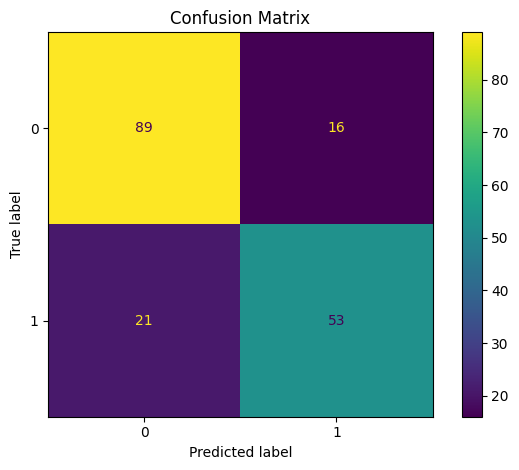

In [18]:
# Confusion 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()

# Optionally, customize the plot (title, labels, etc.)
import matplotlib.pyplot as plt
plt.title('Confusion Matrix')
plt.tight_layout();

#### **2. Accuracy**
Accuracy is the simplest and most commonly used metric. It is the ratio of correctly predicted instances (both true positives and true negatives) to the total number of instances.

</br>

$$\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$$

</br>

Although accuracy is useful, it can be misleading in cases of imbalanced classes. For example, if most passengers did not survive, a model that predicts all passengers as “did not survive” might still achieve high accuracy, even though it’s not useful.

In [19]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.79


#### **3. Precision, Recall, and F1-Score**

##### ***i. Precision:***

Precision is the proportion of correctly predicted positive instances out of all predicted positive instances. It is important when false positives (incorrect positive predictions) are costly.

</br>

$$\text{Precision} = \frac{TP}{TP + FP}$$

</br>

##### ***ii. Recall (Sensitivity or True Positive Rate):***

Recall is the proportion of actual positive instances that were correctly predicted. It is important when false negatives (incorrect negative predictions) are costly.

</br>

$$\text{Recall} = \frac{TP}{TP + FN}$$

</br>

##### ***iii. F1-Score:***

The F1-Score is the harmonic mean of Precision and Recall. It is useful when you want to balance precision and recall, especially in cases of imbalanced datasets.

</br>

$$\text{F1-Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$$

</br>

#### **4. Classification Report**
The classification report is a text summary of the precision, recall, F1-score, and support metrics for each class in the dataset. It can be generated using the `classification_report` function from the `sklearn.metrics` module.

In [20]:
# Import the classification report from sklearn.metrics
from sklearn.metrics import classification_report

# **Print** the classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.81      0.85      0.83       105
           1       0.77      0.72      0.74        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179





#### **5. ROC Curve and AUC (Area Under the Curve)**

The **ROC Curve** is a graphical plot that illustrates the performance of a binary classifier as the decision threshold changes. It plots the **True Positive Rate (Recall)** against the **False Positive Rate (FPR)** at different threshold levels.


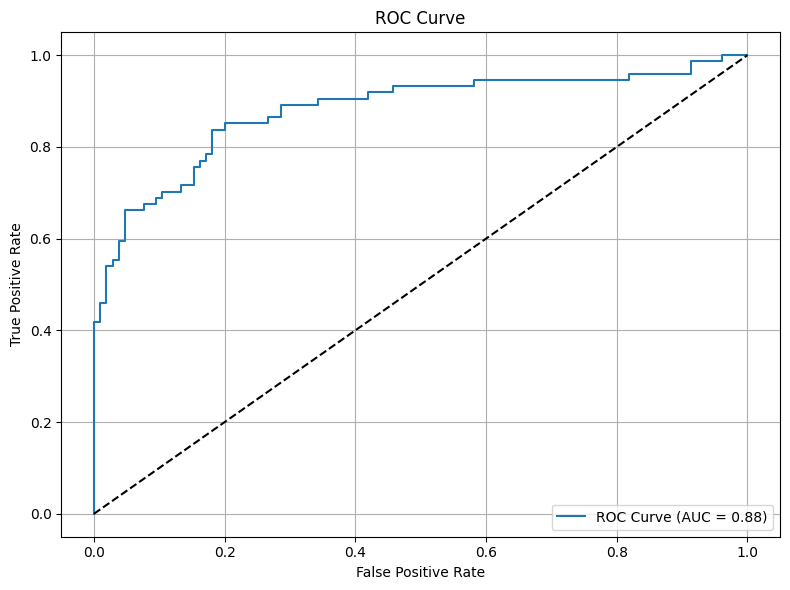

In [21]:
from sklearn.metrics import roc_curve, auc

# Predict probabilities for the positive class (1)
y_prob = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Dashed line represents random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()

The **Area Under the ROC Curve (AUC)** is a single scalar value that summarizes the overall performance of the model. A perfect model has an AUC of 1, while a model that performs no better than random chance has an AUC of 0.5.

#### **Summary of Evaluation Metrics:**

- **Confusion Matrix:** *Provides a detailed breakdown of model predictions.*
- **Accuracy:** *Simple metric for overall performance, but may be misleading with imbalanced data.*
- **Precision & Recall:** *Key metrics for understanding how well the model performs in predicting positive instances.*
- **F1-Score:** *Balances precision and recall, especially useful in imbalanced datasets.*
- **ROC Curve & AUC:** *Measures how well the model distinguishes between classes across different thresholds.*

## K-Nearest Neighbors (KNN)

The **K-Nearest Neighbors (KNN)** algorithm is a simple, instance-based learning algorithm used for classification. **Unlike Logistic Regression, KNN doesn’t assume a specific form for the relationship between the features and the target variable**. Instead, it predicts the class of a data point based on the majority class of its **K nearest neighbors** in the feature space.

#### **How it works:**
- KNN classifies a new data point by looking at the **K nearest data points** (neighbors) in the training set.
- The new point is assigned to the class that is most common among its K neighbors.

#### **Key Concept:**
- **K** is a **hyperparameter** that controls how many neighbors influence the classification. A small K (like 1) will lead to a model that is sensitive to noise, while a large K will smooth over the decision boundary.

##### **Distance Metric:**
- KNN typically uses **Euclidean distance** to measure the distance between points: 
$$
\text{Distance}(A, B) = \sqrt{\sum{(A_i - B_i)^2}}
$$


Take a look at the following image:

<img src="../assets/img/knn.png"  alt="knn" width="700"/>


Too much theory? Let's see it with code:

In [22]:
# Importing the libraries
from sklearn.neighbors import KNeighborsClassifier


In [23]:
# Step 1: Initialize the KNN model (with K=5 as a starting point)
knn_model = KNeighborsClassifier(n_neighbors=5)

# Step 2: Train the model using the training data
knn_model.fit(X_train, y_train)

# Step 3: Make predictions on the test data
y_pred_knn = knn_model.predict(X_test)
y_pred_knn

array([0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1])

In [24]:
# Accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'KNN Accuracy: {accuracy_knn:.2f}')

KNN Accuracy: 0.69


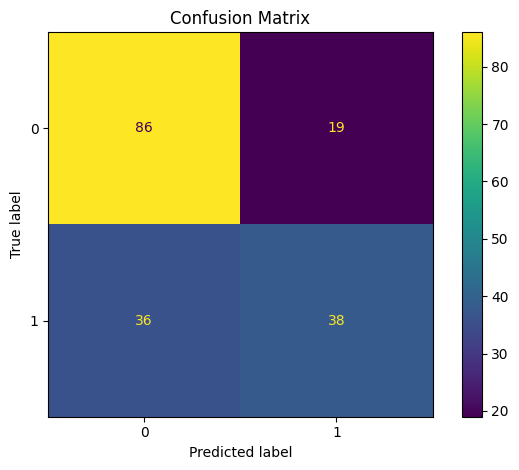

In [25]:
# Confusion Matrix
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_knn)

# Display the confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()

# Optionally, customize the plot (title, labels, etc.)
import matplotlib.pyplot as plt
plt.title('Confusion Matrix')
plt.tight_layout();

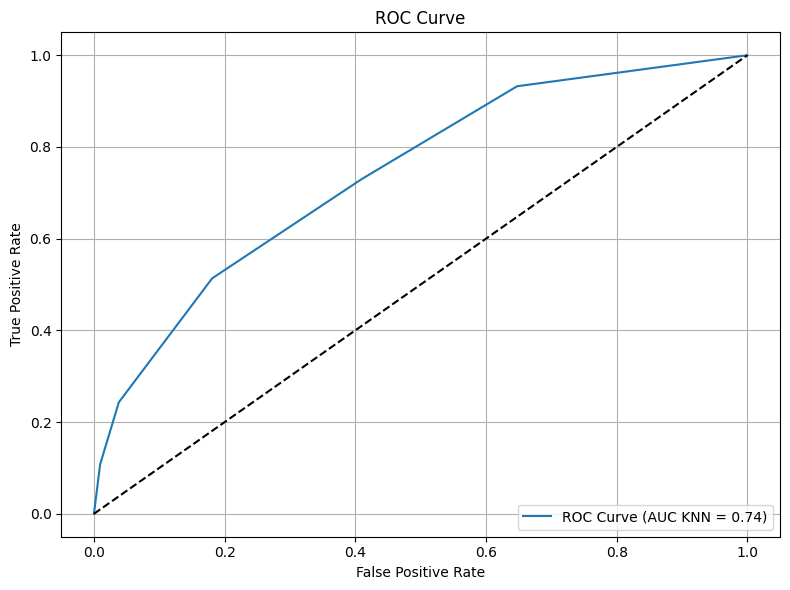

In [26]:
from sklearn.metrics import roc_curve, auc

# Predict probabilities for the positive class (1)
y_prob_knn = knn_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_prob_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Plot ROC curve
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
# plt.plot(fpr, tpr, label=f'ROC Curve (AUC LogReg = {roc_auc:.2f})')
plt.plot(fpr_knn, tpr_knn, label=f'ROC Curve (AUC KNN = {roc_auc_knn:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Dashed line represents random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()

In [27]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.70      0.82      0.76       105
           1       0.67      0.51      0.58        74

    accuracy                           0.69       179
   macro avg       0.69      0.67      0.67       179
weighted avg       0.69      0.69      0.68       179



The KNN model did not perform as well as the Logistic Regression model.

We could try to optimize the model by tuning the hyperparameters, such as the number of neighbors (K), or by scaling the features. 

Let's think about it:

### How to Choose the Right Number of Neighbors  K  in KNN

Choosing the right number of neighbors,  K , is crucial in the K-Nearest Neighbors (KNN) algorithm. If you choose  K  too small or too large, it can impact the model’s performance. Here’s a simple guide for beginners on how to select the best  K .

**i. Small  K  Values (e.g.,  K = 1 )**

*What happens:*
- The model considers only the closest neighbor for each prediction.
- The decision boundaries are very tight and complex because it tries to classify based on very local information.

*Issues:*
- It is highly sensitive to noise. A single misclassified or outlier data point can drastically affect the prediction.
- This can lead to overfitting, where the model performs well on the training data but poorly on unseen data.

**ii. Large  K  Values (e.g.,  K =  number of samples)**

*What happens:*
- The model considers a larger number of neighbors, potentially all training points.
- The decision boundaries become too smooth, and the model will tend to predict the majority class for most points.

*Issues:*
- This can lead to underfitting, where the model is too simplistic and doesn’t capture important patterns in the data.

**iii. The Goldilocks Zone: Choosing the “Just Right”  K**

**Goal:** Find a balance between too small and too large  K  values.

How to do it:
- Experiment with **different values of  K** , typically starting with smaller values (like 3, 5) and incrementing gradually (e.g., 7, 9, 11, etc.).
- **Cross-validation:** Split the dataset into multiple training and testing subsets to evaluate different  K  values. Choose the  K  that provides the best performance on the validation set.
- ***Tip**: Start with odd values of  K  (e.g., 3, 5, 7, etc.) to avoid ties when the classification is binary (two classes). This prevents scenarios where the number of neighbors from each class is equal.*


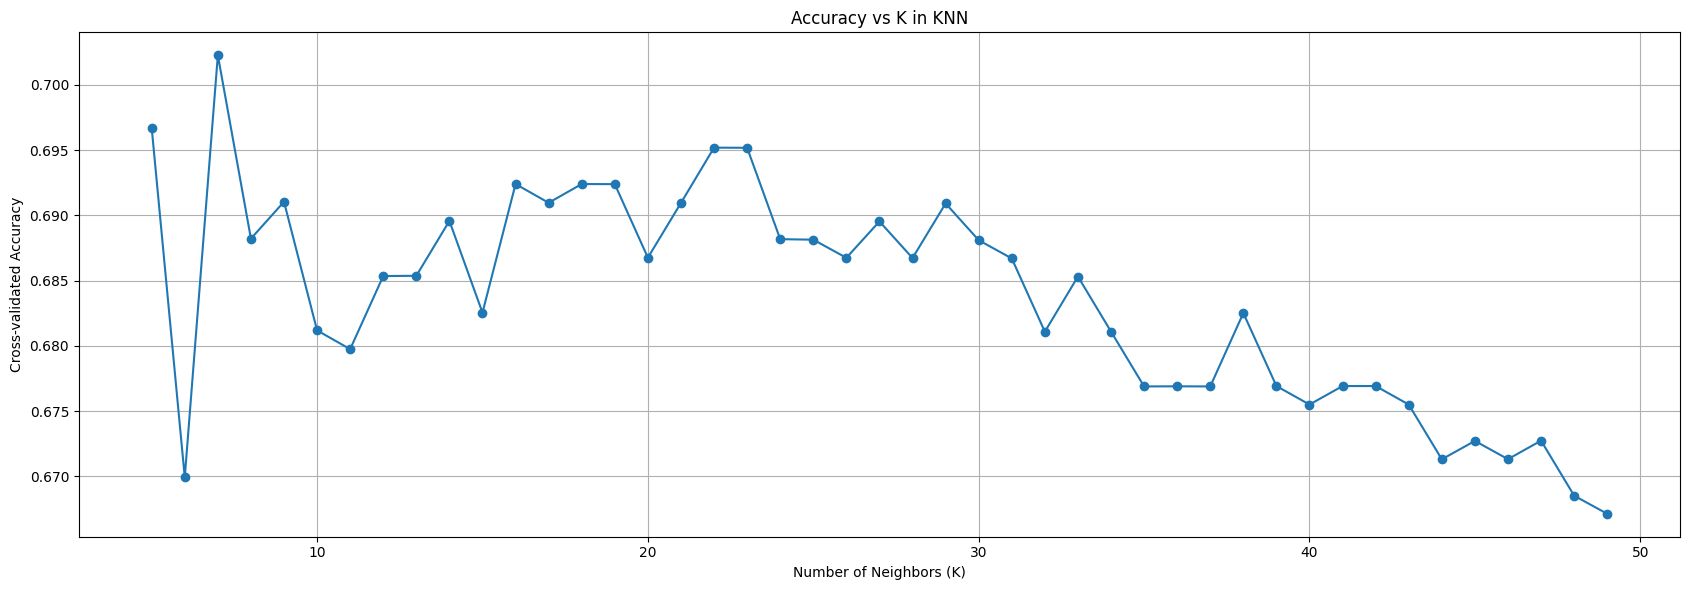

In [ ]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Create a list to store accuracy scores for each value of K
k_values = np.arange(5, 50)  # Testing K from 1 to 19
accuracy_scores = []

# Loop over each K and perform cross-validation
for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_model, X_train, y_train, cv=5, scoring='accuracy')
    accuracy_scores.append(scores.mean())

# Plot the accuracy for each K
plt.figure(figsize=(17, 6))
plt.plot(k_values, accuracy_scores, marker='o')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Cross-validated Accuracy')
plt.title('Accuracy vs K in KNN')
plt.grid(True)
plt.tight_layout()

In [32]:
k_values

array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

It seems like when $K=7$ we have the best accuracy.

Let's see how a model with $K=7$ performs using the ROC curve and AUC:

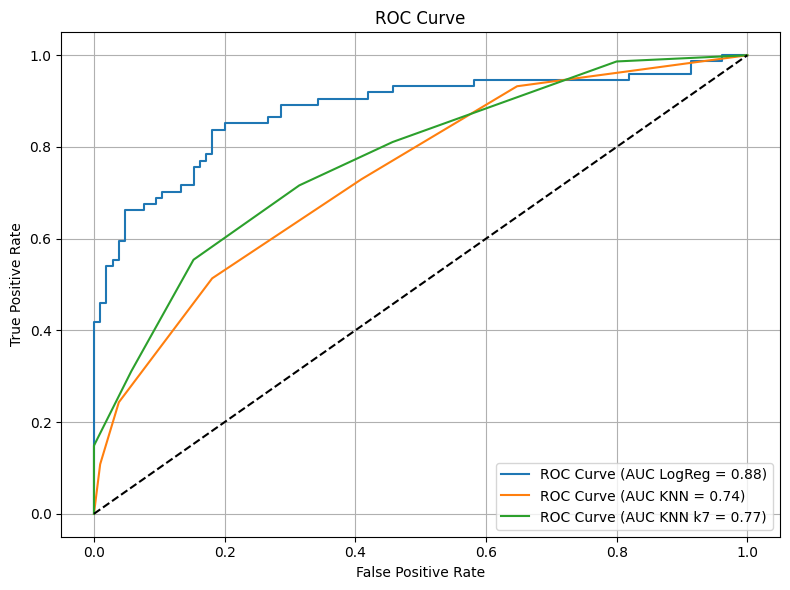

In [43]:
from sklearn.metrics import roc_curve, auc

# Fit a model with K=7
knn_model_k7 = KNeighborsClassifier(n_neighbors=7)
knn_model_k7.fit(X_train, y_train)

# Predict probabilities for the positive class (1)
y_prob_knn_k7 = knn_model_k7.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr_knn_k7, tpr_knn_k7, thresholds_knn_k7 = roc_curve(y_test, y_prob_knn_k7)
roc_auc_knn_k7 = auc(fpr_knn_k7, tpr_knn_k7)

# Plot ROC curve
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC LogReg = {roc_auc:.2f})')
plt.plot(fpr_knn, tpr_knn, label=f'ROC Curve (AUC KNN = {roc_auc_knn:.2f})')
plt.plot(fpr_knn_k7, tpr_knn_k7, label=f'ROC Curve (AUC KNN k7 = {roc_auc_knn_k7:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Dashed line represents random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()

## Questons?